In [2]:
import pandas as pd

import os

import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import anndata as ad
import glob
from sklearn.metrics import adjusted_rand_score

import warnings
warnings.filterwarnings("ignore")

import matplotlib
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42


In [3]:
import json

# Load configuration
with open("../../config/config_notebooks_HER2_with_TNBC_model.json", "r") as config_file:
    config = json.load(config_file)


In [4]:
# UNI 
path_to_unsupervised_clustering = os.path.join(config['retrained_benchmark_folder2'], "unsupervised_clustering_ARI", "kmeans")

In [7]:
with open(os.path.join(path_to_unsupervised_clustering, "ARI_patient_uni_and_full.json"), "r") as f:
    ARI_patient_uni_and_full = json.load(f)
    
with open(os.path.join(path_to_unsupervised_clustering, "ARI_patient_TNBC_uni_full_koleo_4096_prototypes.json"), "r") as f:
    ARI_patient_uni_TNBC_model = json.load(f)

In [13]:
dict_batch = {}
dict_batch["uni"] = 1 - ARI_patient_uni_and_full["uni"]
dict_batch["uni_full_koleo_16384_prototypes"] = 1 - ARI_patient_uni_and_full["uni_full_koleo_16384_prototypes"]
dict_batch["TNBC_uni_full_koleo_4096_prototypes"] = 1 - ARI_patient_uni_TNBC_model["TNBC_uni_full_koleo_4096_prototypes"]

In [16]:
df_batch = pd.DataFrame(dict_batch, index=[0]).melt(var_name="model", value_name="1 - ARI (batch effect)")
df_batch

,model,1 - ARI (batch effect)
0,uni,0.719182
1,uni_full_koleo_16384_prototypes,0.827251
2,TNBC_uni_full_koleo_4096_prototypes,0.859830


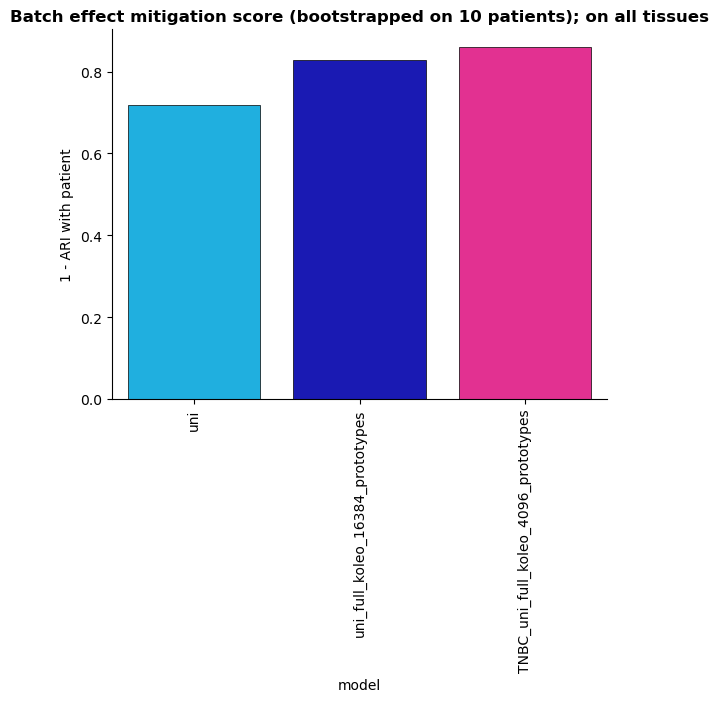

In [17]:

sns.barplot(data=df_batch,
            x='model', 
            y='1 - ARI (batch effect)', 
            palette=config["retrained_color_palette"],
          linewidth=0.5,
          edgecolor="black",
          )
plt.ylabel("1 - ARI with patient")
plt.title("Batch effect mitigation score (bootstrapped on 10 patients); on all tissues", weight='bold')
plt.xticks(rotation=90)
sns.despine()